# FFT and aliasing

## Section 1

Now we use $y = \sin(x)$ and $y = \cos(x)$ to see the operation of fft. 
* $y = \sin(x)$ and $y = \cos(x)$ are periodic functions and the range is from $0$ to $2\pi$
* We choose $N+1$ points between $0$ to $2\pi$ so `x = range(0,stop=2*pi,length=N+1)`, but since that $\sin(0)$ and $\sin(2\pi)$ are the same, so we only need to use `x = x[1:N]`.

In [25]:
using FFTW
using LinearAlgebra
using Plots

In [2]:
N = 100;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
k = [0:N/2, -N/2+1:-1];

Now we want to get Fourier coefficient of $y = \sin(x)$.
* First, because x is an array so we use fs = sin.(x), then we store the value in fs.
* Second, we do Fourier transform and store it in fs_hat.
* Third, we plot the imaginary part of the results afjer transforming. 

By Euler's function $\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{2i}(e^{i\theta} - e^{-i\theta})$

##### In the following is the formula of discrete Fourier transform:

$\hat{v_k}=\frac{2\pi}{N}\sum_{j=1}^{N}e^{-ik{x_j}}{v_j}$

##### the formula of inverse discrete Fourier transform:

${v_j}=\frac1{2\pi}\sum_{k={-N/2+1}}^{N/2}e^{ik{x_j}}\hat{v_k}$

So we compare $\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{2i}(e^{i\theta} - e^{-i\theta})=\frac{1}{2 \pi}(-i \pi e^{i\theta} + i \pi e^{-i\theta} )$ with the formula of inverse discrete Fourier transform, we can discover $\hat{fs}_1=i\pi$ $\hat{fs}_{-1}=-i\pi$

##### But in julia the formula of discrete Fourier transform is:

$\hat{v_k}=\sum_{j=1}^{N}e^{-ik{x_j}}{v_j}$

##### the formula of inverse discrete Fourier transform is:

${v_j}=\frac1{N}\sum_{k={-N/2+1}}^{N/2}e^{ik{x_j}}\hat{v_k}$

$\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{2i}(e^{i\theta} - e^{-i\theta})=\frac{1}{N}(\frac{-i N}{2} e^{i\theta} + \frac{i N}{2} e^{-i\theta} )$, so $\hat{fs}_1={-iN}/2$ $\hat{fs}_{-1}=iN/2$

$\sin(n\theta) = \frac{e^{in\theta} - e^{-in\theta}}{2i} = \frac{1}{2i}(e^{in\theta} - e^{-in\theta})=\frac{1}{N}(\frac{-inN}{2} e^{i\theta} + \frac{inN}{2} e^{-i\theta} )$, so $\hat{fs}_n={-inN}/2$ $\hat{fs}_{-n}=inN/2$


* Reference: [Understand the FFT](https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/)

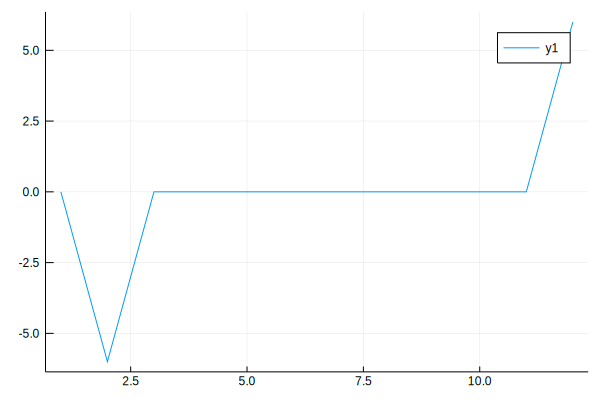

In [24]:
fs = sin.(x);
fs_hat = fft(fs);
plot(imag(fs_hat))

Since that, by Euler's function $\cos(\theta) = \frac{e^{i\theta} + e^{-i\theta}}{2} = \frac{1}{N}(\frac{- N}{2} e^{i\theta} + \frac{ N}{2} e^{-i\theta} )$

and we get Fourier's coefficient by discrete Fourier transform so $\hat{fs}_1 = N/2$, $\hat{fs}_{-1} = -N/2$

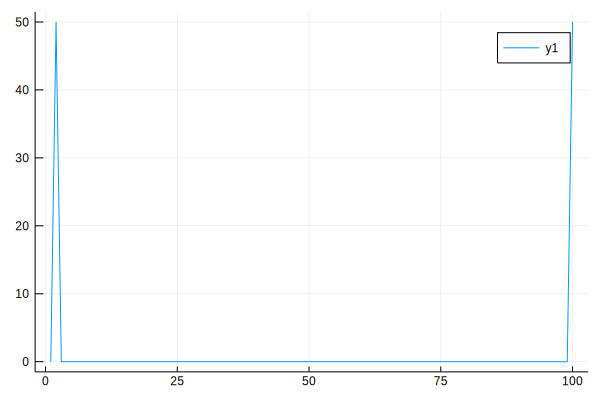

In [4]:
fc = cos.(x);
fc_hat = fft(fc);
plot(real(fc_hat))

In [5]:
N = 1000;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
k = [0:N/2, -N/2+1:-1]

2-element Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1}:
 0.0:1.0:500.0  
 -499.0:1.0:-1.0

Since that, by Euler's function 
* $\sin(\theta) = \frac{e^{i\theta} - e^{-i\theta}}{2i} = \frac{1}{N}(\frac{-i N}{2} e^{i\theta} + \frac{i N}{2} e^{-i\theta} )$
* $\sin(100\theta) = \frac{e^{i100\theta} - e^{-i100\theta}}{2i} =  \frac{1}{N}(\frac{-i100N}{2} e^{i\theta} + \frac{i100N}{2} e^{-i\theta} )$                              

and we get Fourier's coefficient by discrete Fourier transform so 
* $\hat{fs}_1 =\frac{1}{i}50$, $\hat{fs}_{-1} = \frac{1}{i}(-50)$
* $\hat{fs}_{100} =\frac{1}{i}5000$, $\hat{fs}_{-100} = \frac{1}{i}(-5000)$

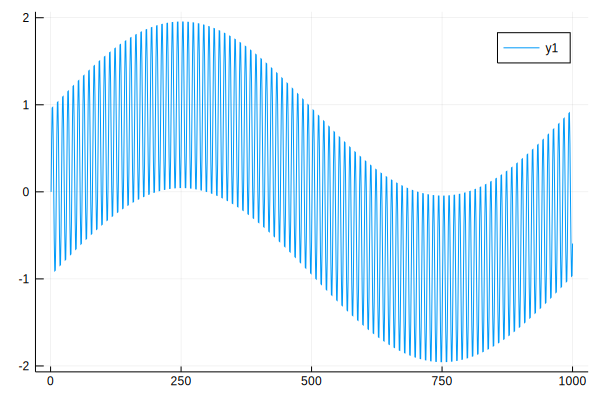

In [6]:
fw = sin.(x)+sin.(100*x);
fw_hat = fft(fw);
plot(fw)

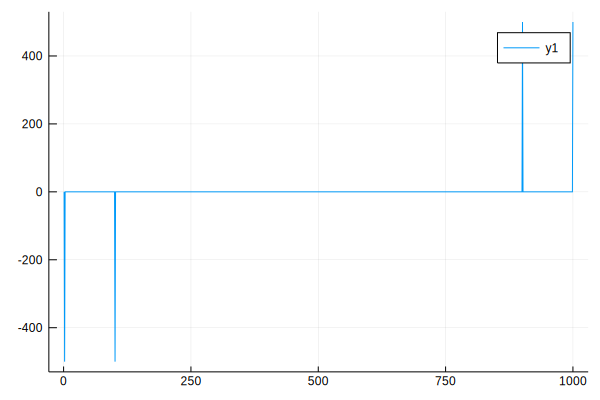

In [7]:
plot(imag(fw_hat))

## Section 2 - Aliasing 

From the below diagram, we could find out that there only have two fourier coefficients, but theroticallly there must have four fourier coefficients.

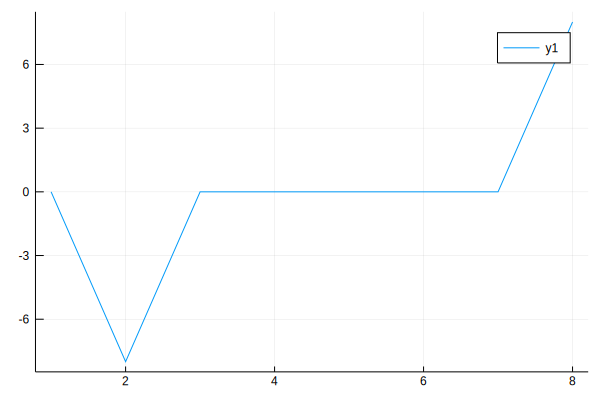

In [8]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh=sin.(x)+sin.(9*x);
fh_hat=fft(fh);
plot(imag(fh_hat))

In the below, we set N=8, and plot both sinx and sin(9*x), we can discover that the diagram are same, so we know that the diagram of sin(9*x) has some mistake.

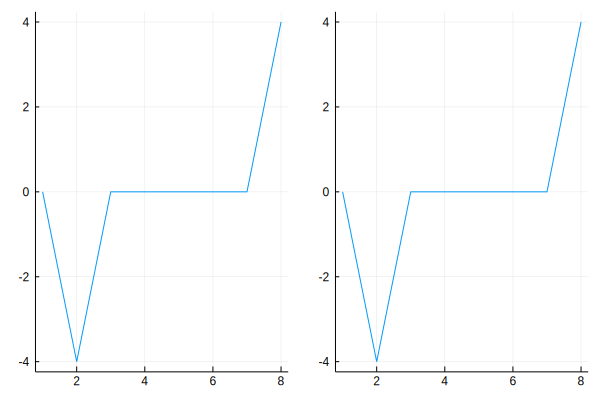

In [26]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh1=sin.(x);
fh1_hat=fft(fh1);
fh11=plot(imag(fh1_hat))

N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fh2=sin.(9*x)
fh2_hat=fft(fh2);
fh22=plot(imag(fh2_hat))

plot(fh11,fh22,layout=(1,2),legend=false)

### Reason 1 for aliasing : Inherent in sampling.

#### Alias happens when the size N of sampled Fourier modes is less than the actual size of Fourier modes (origin) , in such cases, due to the cyclic assumption in DFT, (origin) Fourier mode with wave number out of the size range is aliased to a wavenumber in the domain according to the cyclic rule.

----------------------------------------------------------------------------------------------------------------------------------------------
#### Quoted to chapter two (p.10) in Spectral methods in Matlab by Lloyd N. Trefethen. 

Two complex exponentials $f(x)=e^{i{k}_{1}x}$ and $g(x)=e^{i{k}_{2}x}$ are unequal over R (R:real numbers) if ${k}_{1}$ not equal ${k}_{2}$. But if we restrict f, g to hZ (Z:intergers), however, they take values ${f}_{j}=e^{i{k}_{1}{x}_{j}}$ and ${g}_{j}=e^{i{k}_{2}{x}_{j}}$, and if ${k}_{1}$-${k}_{2}$ is an interger multiple of $2\pi/h$ then ${f}_{j}={g}_{j}$ for each j.
* N=h, how many sampled Fourier modes.
* Above is an reason why any complex exponentials $f(x)=e^{i{k}_{1}x}$ there are infinitely many other complex exponentials that match it on the grid hZ (Z:intergers), equivalently $f(x)=e^{i{k}_{1}x}$ has infinitely many other different interpolations, this is called "aliases" of k.


e.g. 

In the following, since that N=8, it's equivalent to restrict sin(x) and sin(9x) to 8Z (Z:intergers), so $\delta{x}=2\pi/h$=$2\pi/8$=$\pi/4$ and ${x}_{i}=i\delta{x}$ sin(9${x}_{i}$)=sin($9i\pi/4$)=sin($(9-8)i\pi/4$)=sin($i\pi/4$)=sin(${x}_{i}$)


Consequently, sin(9x)=sin(x) in this example, that is we can't describe high frequency of sin(9x), N=8 is not enough.
#### We can also conclude that, if we choose too small "N", we can't get the correct diagram of sin(9*x).

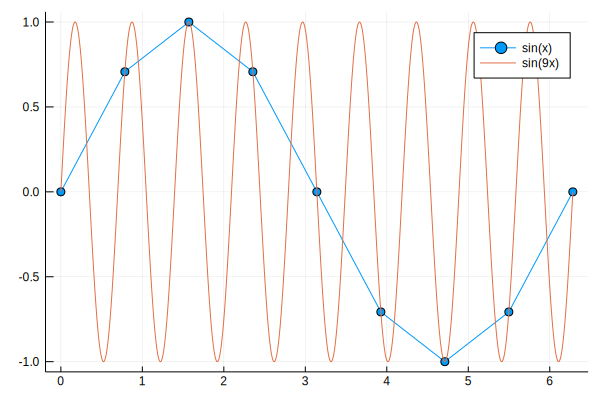

In [10]:
N=8;
x = range(0,stop=2*pi,length=N+1);
f=sin.(x);
u=plot(x,f,marker=:circle,label="sin(x)");
NN=1000;
xx = range(0,stop=2*pi,length=NN+1);
fh=sin.(9*xx);
plot!(u,xx,fh,label="sin(9x)")

## Section 3 - De-aliasing

### Reason 2 for aliasing : When we deal with some nonlinear problem that generate high frequency data, this will make our results wrong.

#### Quoted to reference :http://notes.yeshiwei.com/pseudo_spectral_method/algorithm.html?fbclid=IwAR2ZMmxoMNkCwKeN-0Bjvb6HfsO-00Q7nQCkCjx0jPetiOXh0tIxlw1Iwzw.

* The Foureier modes used are: 

Modes: $e^{2\pi{ijn}/N}$

Wave vectors: ${k}_{j}=2\pi{j}/N\delta$, j=-N/2,...,N/2

Grid points: ${z}_{n}=n\delta$, n=0,1,2,....,N-1

* At the grid points xn,$e^{2πinj/N}$ equals:

Modes: $e^{2\pi{i(j+lN)n}/Nf}$, l=....,-2,-1,0,1,2,......
          

this implies that the high frequency modes with:

$k1=2π(j+lN)/(N\delta)\qquad (high\quad frequency)$

contribute to the DFT as if they had

$k2=2πj/N\delta \qquad (low\quad frequency)$

i.e. high frequency modes alias/bias the amplitude a lower frequency modes!

e.g. assume we have a non-linear term ρu in our PDE, and ρ(z)=sin(${k}_{1}$z),u(z)=sin(${k}_{2}$z), with ${k}_{1}$, ${k}_{2}$ form our set of available wave vectors ${k}_{j}$, now ρu-cos[(${k}_{1}$+${k}_{2}$ )z]+cos[(${k}_{2}$-${k}_{1}$ )z], and ${k}_{1}$+${k}_{2}$ may lie outside our range of k's, and the available Foureier amplitudes might get aliased$\implies$That is, ${k}_{1}$+${k}_{2}$ outside range if ${k}_{1}$+${k}_{2}>\pi$, and the amplitude appears wrongly in the range of k's at ${k}_{1}$+${k}_{2}-2\pi$.

#### It's need to notice that  e.g.  $e^{2\pi{i(j+lN)n}/Nf}$ alias $e^{2\pi{ijn}/Nf}$, the value of  the amplitude appears wrongly in the range of k's , but calculated at the sampling point is same, but frequency between the samples is different, and this will also have influence to the derivative.  

## Example 1
Now we want to find fourier coefficients of sin(3x)^2 through sin(3x).

According to the above example we know that, by DFT $\sin(3\theta) = \frac{1}{N}(\frac{-i3N}{2} e^{i\theta} + \frac{i3N}{2} e^{-i\theta} )$ , then we get Fourier's coefficients by discrete Fourier transform  $\hat{fs}_3 =\frac{12}{i}$, $\hat{fs}_{-3} =\frac{-12}{i}$, that is it's highest frequency is 3 .

And when we set the number of grids N=8, then the wave number k=-3,-2,-1,0,1,2,3,4 , so it's enough to reflecting highest frequency. 

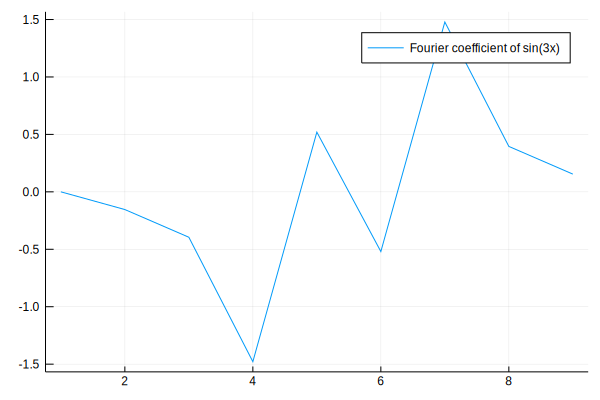

In [28]:
N=8;
x = range(0,stop=2*pi,length=N+1);
fd=sin.(3*x);
fd_hat=fft(fd);
plot(imag(fd_hat),label="Fourier coefficient of sin(3x)")

## Example 2
In the following we try to find the coefficients of $f(x)=\sin(3x)^2$, we still set the number of grids N=8, then the wave number k=-3,-2,-1,0,1,2,3,4 , and the result is wrong so we know that it's not enough, since that it can't reflecting high frequencies.

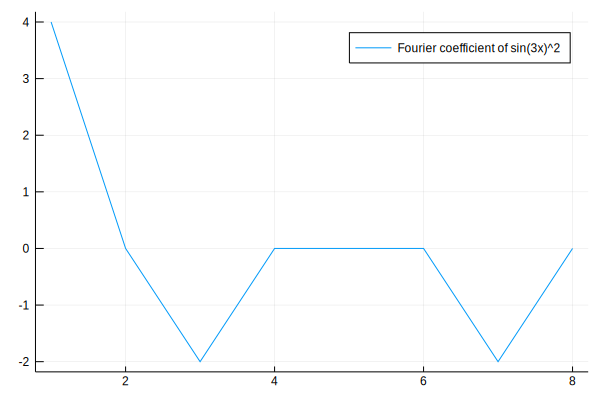

In [30]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fk=(sin.(3*x)).^2;
fk_hat=fft(fk);
plot(real(fk_hat),label="Fourier coefficient of sin(3x)^2")

We translate $f(x)=\sin(3x)^2$ into $\frac{1-\cos(6x)}{2} $, and since that $\frac{1-\cos(6x)}{2}=\frac{2-e^{6i}-e^{-6i}}{4}$ so we will find $\hat{fs}_0$, $\hat{fs}_6$ $\hat{fs}_{-6}$, that is it's highest frequency is 6. 

So we should set N=16, then k=-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8, so it's enough to reflecting highest frequency. 

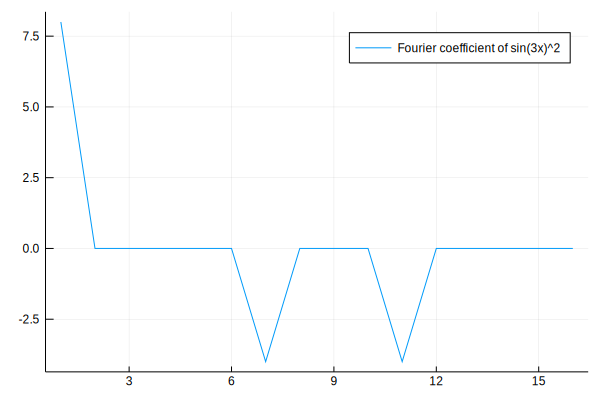

In [13]:
N=16;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
fs=(sin.(3*x)).^2;
fs_hat=fft(fs);
plot(real(fs_hat),label="Fourier coefficient of sin(3x)^2")

## Section 3.1 - Zero-padding
### Treatment : Zero-padding

#### The definition of zero-padding is adding zeros to end of a time-domain signal to increase the length.

In julia, the Fourier coefficients of u(x) (fft) is $$\hat{u}_{k} = \sum_{j = 1}^{N} e^{-i k x_j} u_j$$ N is the number of points between $[0,2\pi)$

When we put u(x) square, the kth Fourier coefficients of $u(x)^2$ is 

$$ F_N[u^2]_k = \sum_{m+n = k} \hat{u}_m \hat{u}_n  = \sum_{-\frac{N}{2}+1 \leq m,k-m \leq \frac{N}{2}} \hat{u}_m \hat{u}_{k-m} + \sum_{-\frac{N}{2}+1 \leq m \leq \frac{N}{2},~ k-m > \frac{N}{2} ~or~ k-m <-\frac{N}{2}+1} \hat{u}_m \hat{u}_{k-m}$$ 

(case 1)$k - m > N/2 $, will aliased to $k - m - N $

(case 2)$k - m < -N/2 $, will aliased to $k - m + N $.


----------------------------------------------------------------------------------------------------------------------------------------------




$K/2+2\quad K-N/2+2 \qquad1\qquad N/2+1 \qquad\quad K/2+1\implies {u}_{hat}$ (has been extended)

$\qquad\quad N/2+2 \qquad\qquad1\qquad\qquad N/2+1 \qquad\quad\qquad \implies {u}_{hat}$ (before extended)

$ \quad {u}_{j^*}=0 \qquad \qquad \qquad \qquad\qquad\qquad\quad \quad {u}_{j^*}=0$

|///////////////////|-------------------------|------------------------|/////////////////|

$\qquad\qquad free\qquad\qquad of\qquad\qquad aliasing \qquad\qquad\qquad$

$-K/2+1\qquad-N/2+1 \qquad0\qquad N/2 \qquad\quad K/2\implies\hat{u}_{i}$


In the following we want to explain why is 3/2-rule and briefly descript the process.

That is, to make the N Fourier modes free of aliasing, we extend the vector on both sides by zeros, to
a larger vector of size "K" and do the Fourier transform ${F}_{K}$ for the K vector.


To determine K, let k, m ∈ [−N/2 + 1, N/2], and consider two case:

(case 1) If k − m > K/2, then it is aliased to k − m − K$\implies$To keep the [−N/2 + 1, N/2] modes aliase free, we need k − m − K < −N/2 + 1$\implies$The largest possible value of k − m is N − 1, achieved at k = N/2, m = −N/2 + 1 $\implies$ This leads to N − 1 − K < −N/2 + 1, or equivalently, K > 3/2N − 2

(case 2) If k −m < −K/2 + 1, it is aliased to k −m + K$\implies$To keep the [−N/2 + 1, N/2] modes aliase free, we need k −m + K > N/2 to avoid aliasing$\implies$The smallest possible value of k − m is -N + 1, achieved at k = -N/2+1, m = N/2$\implies$This leads to −N + 1 + K > N/2, or equivalently, K > 3/2N - 1



Hence, we can set K =3/2N (the total number).




* It's need to notice that using zero-padding has some reason : If there is a power-of-two number of samples (that is, if the time-domain length of waveform is power of two), this can lead to speeding up the processing time.

* Ref:http://www.math.jhu.edu/~feilu/notes/DealiasingFFT.pdf

# N is even

## Example 1

In the following, we want to get the Fourier coefficients of $sin(3x)^2$ through $sin(3x)$, $sin(3x)^2=(1-cos(6x))/2$, so we will get $\hat{f}_{0}$ and $\hat{f}_{6}$, so at least need N=12. In the following, we plot $sin(3x)^2$ and $(1-cos(6x))/2$ respectively to check the results.



$K/2+2\quad K-N/2+2 \qquad1\qquad N/2+1 \qquad\quad K/2+1\implies {u}_{hat}$ (has been extended)

$\qquad\quad N/2+2 \qquad\qquad1\qquad\qquad N/2+1 \qquad\quad\qquad \implies {u}_{hat}$ (before extended)

$ \quad {u}_{j^*}=0 \qquad \qquad \qquad \qquad\qquad\qquad\quad \quad {u}_{j^*}=0$

|///////////////////|-------------------------|------------------------|/////////////////|

$\qquad\qquad free\qquad\qquad of\qquad\qquad aliasing \qquad\qquad\qquad$

$-K/2+1\qquad-N/2+1 \qquad0\qquad N/2 \qquad\quad K/2\implies\hat{u}_{i}$

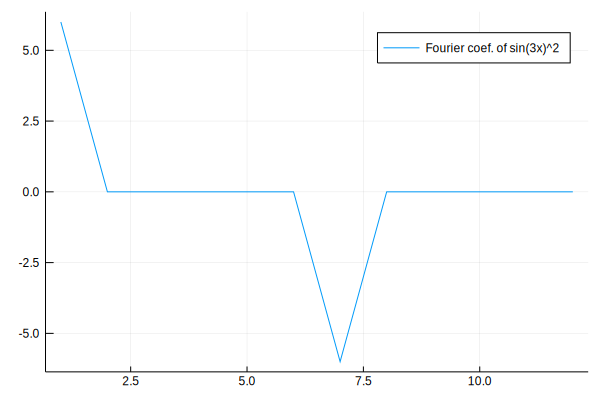

In [14]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = sin.(3*x);
f_hat = fft(f)


#to de extension
K = N*3/2;
f_hat_new = zeros(Int(K))+zeros(Int(K))*im;
f_hat_new[1:Int(N/2 +1)] = f_hat[1:Int(N/2 +1)]
#Has been extended                  #Before extension
f_hat_new[Int(K-N/2+2):Int(K)] = f_hat[Int(N/2+2):Int(N)];
f_hat_new = (K/N)*f_hat_new;


fs = ifft(f_hat_new);
g = fs.^2;


g_hat = fft(g)
plot(real(g_hat),label="Fourier coef. of sin(3x)^2")

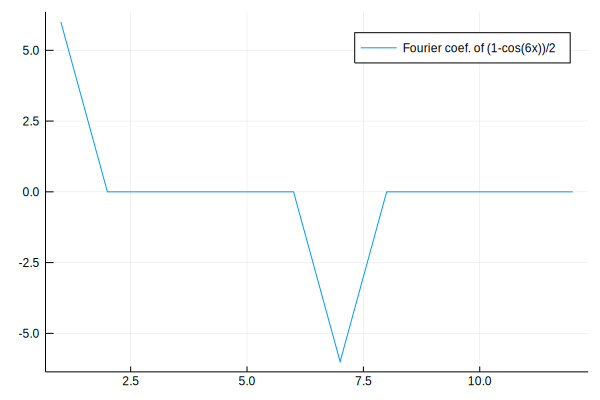

In [75]:
N=12;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = (ones(N,1)-cos.(6*x))./2;
f_hat = fft(f)
plot(real(f_hat),label="Fourier coef. of (1-cos(6x))/2")

# N is odd

## Example 1

In the following, we want to get the Fourier coefficients of $sin(3x)^2$ through $sin(3x)$, $sin(3x)^2=(1-cos(6x))/2$, so we will get $\hat{f}_{0}$ and $\hat{f}_{6}$, so at least need N=13. In the following, we plot $sin(3x)^2$ and $(1-cos(6x))/2$ respectively to check the results.



$K/2+2\quad K-N/2+2 \qquad1\qquad N/2+1 \qquad\quad K/2+1\implies {u}_{hat}$ (has been extended)

$\qquad\quad N/2+2 \qquad\qquad1\qquad\qquad N/2+1 \qquad\quad\qquad \implies {u}_{hat}$ (before extended)

$ \quad {u}_{j^*}=0 \qquad \qquad \qquad \qquad\qquad\qquad\quad \quad {u}_{j^*}=0$

|///////////////////|-------------------------|------------------------|/////////////////|

$\qquad\qquad free\qquad\qquad of\qquad\qquad aliasing \qquad\qquad\qquad$

$-K/2\qquad-N/2 \qquad0\qquad N/2 \qquad\quad K/2\implies\hat{u}_{i}$


-----------------------------------------------------------------------------------------------------------------------------------------


$K/2+2\quad K-N/2+2 \qquad1\qquad N/2+1 \qquad\quad K/2+1\implies {u}_{hat}$ (has been extended)

$\qquad\qquad 5 \qquad\qquad\qquad1\qquad\qquad\qquad 4 \qquad\quad\qquad \implies {u}_{hat}$ (before extended)

$ \quad {u}_{j^*}=0 \qquad \qquad \qquad \qquad\qquad\qquad\quad \quad {u}_{j^*}=0$

|///////////////////|-------------------------|------------------------|/////////////////|

$\qquad\qquad free\qquad\qquad of\qquad\qquad aliasing \qquad\qquad\qquad$

$-K/2\qquad-3 \qquad\qquad0\qquad\qquad\qquad 3 \qquad\quad K/2\implies\hat{u}_{i}$


----------------------------------------------------------------------------------------------------------------------------------------


To determine K, let k, m ∈ [−N/2 + 1, N/2], and consider two case:

(case 1) If k − m > K/2, then it is aliased to k − m − K$\implies$To keep the [−N/2 + 1, N/2] modes aliase free, we need k − m − K < −N/2 + 1$\implies$The largest possible value of k − m is N − 1, achieved at k = N/2, m = −N/2 + 1 $\implies$ This leads to N − 1 − K < −N/2 + 1, or equivalently, K > 3/2N − 2

(case 2) If k −m < −K/2 + 1, it is aliased to k −m + K$\implies$To keep the [−N/2 + 1, N/2] modes aliase free, we need k −m + K > N/2 to avoid aliasing$\implies$The smallest possible value of k − m is -N + 1, achieved at k = -N/2+1, m = N/2$\implies$This leads to −N + 1 + K > N/2, or equivalently, K > 3/2N - 1



Hence, we can set K =3/2N (the total number).


# The following example has some problem!

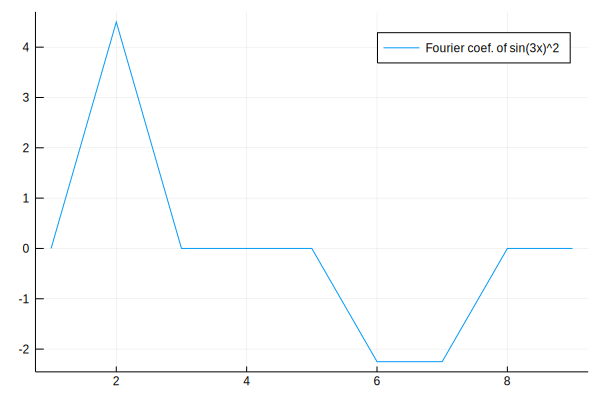

In [102]:
M=7;
x = range(0,stop=2*pi,length=M+1);
x = x[1:M];
f = sin.(3*x);
f_hat = fft(f)

N=7-1;
#to de extension
K = N*3/2;
f_hat_new = zeros(Int(K))+zeros(Int(K))*im;
f_hat_new[1:Int(N/2 +1)] = f_hat[1:Int(N/2 +1)]
#Has been extended                  #Before extension
f_hat_new[Int(K-N/2+2):Int(K)] = f_hat[Int(N/2+2):Int(N)];
f_hat_new = (K/M)*f_hat_new;


fs = ifft(f_hat_new);
g = fs.^2;


g_hat = fft(g)
plot(real(g_hat),label="Fourier coef. of sin(3x)^2")

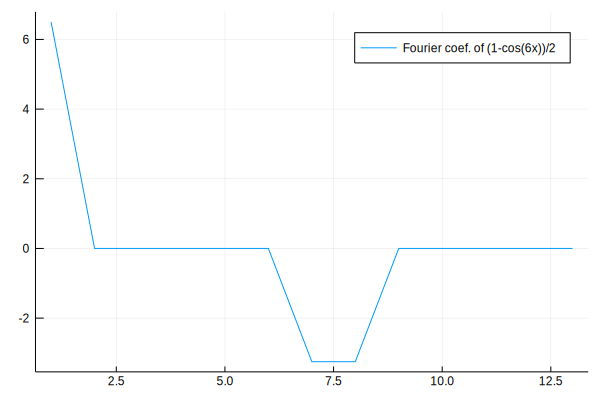

In [100]:
N=13;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
f = (ones(N,1)-cos.(6*x))./2;
f_hat = fft(f)
plot(real(f_hat),label="Fourier coef. of (1-cos(6x))/2")

## Section 3.2 - Truncating  (2/3-rule)
### Treatment : Truncating

To calaulate $f(x)^2$, and set N is even,$${f_j}=\frac1{N}\sum_{k={-N/2+1}}^{N/2}e^{ijx}\hat{f_j}~~,~~{f_s}=\frac1{N}\sum_{k={-N/2+1}}^{N/2}e^{isx}\hat{f_s},$$so $f^2(x) = f_j(x)f_s(x)$ will product high frequency $\hat{f}_{s+j} e^{i (s+j) x}$.  And $s+j$ will aliased to $ s+j-N $.


---------------------------------------------------------------------------------------------------------------------------------------------

The basic idea of truncation zero-padding is set some fourier coefficients in the range to zero, that is we pre-filtering high-frequency components to avoid them to interfer low frequency, it's sounds abstract, so in the following i will give a simple interpretention.



 ${u}_{j^*}=0 \qquad \qquad \qquad \qquad  {u}_{j^*}=0$

|////////////////|-------------|-------------|//////////////|

$\qquad\quad free\quad of\quad aliasing \qquad\qquad\qquad$

$-N/2\quad-K\qquad0\qquad K\quad N/2\implies\hat{f}_{i}$

(Case 1)
* Let $j,s\in[0,K]$, if j+s > N/2, the amplitude corresponding to j+s will be aliased to j+s-N.

* If j+s-N < -K, the largest j,s in the range are $j=s=K\implies2K-N<-K\implies3K<N\implies K<N/3$

### $\therefore$ we set K = (2/3)N/2 = N/3

$\therefore$ this is why truncating rule is 2/3 rule

(Case 2)

And for j+s > N/2 the amplitude is aliased to j+s-N, which lie in [-K,0], we no longer have to care, since that the amplitude at j and s are set to be 0$\implies$the range [-K,K] is free of aliasing.

* Ref:http://notes.yeshiwei.com/pseudo_spectral_method/algorithm.html?fbclid=IwAR2ZMmxoMNkCwKeN-0Bjvb6HfsO-00Q7nQCkCjx0jPetiOXh0tIxlw1Iwzw

# N is odd

### Example 1
Let g(x)=sin(x), $f(x)=g^2(x)=sin^2(x)=1-cos(2x)/2$, so there will exists $\hat{f}_{0}$、$\hat{f}_{2}$、$\hat{f}_{-2}$, so if we wet N=7, it will contain $\hat{f}_{-3}, \hat{f}_{-2}, \hat{f}_{-1}, \hat{f}_{0}, \hat{f}_{1}, \hat{f}_{2}, \hat{f}_{3}$, so whether do truncating or not isn't important.

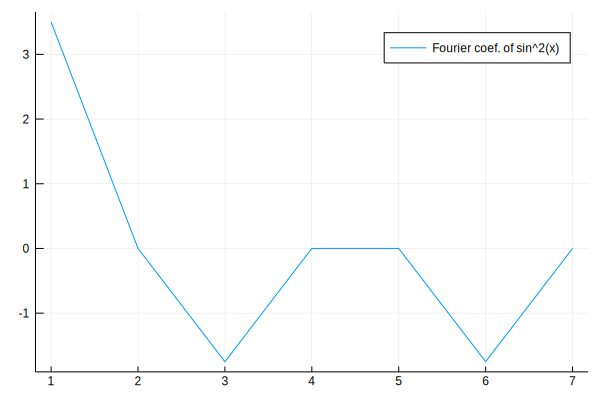

In [55]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
g = sin.(x);
f= g.^2;
f_hat = fft(f);
plot(real(f_hat),label="Fourier coef. of sin^2(x)")

#c=length(f_hat[1:4])

In the following, we do truncating, to remove high frequency.

Here we set N=7, so K < (2/3)(N/2)=2

 $-3\quad-2\quad-1\qquad0\qquad1\quad\qquad2\qquad\quad3\implies\hat{g}_{i}$

$|---|---|---|---|---|---| $

$5\qquad6\qquad7\qquad\quad1\qquad2\qquad\quad3\qquad\quad4\implies{g}_{hat}$

so we let $\hat{g}_{2}$、$\hat{g}_{3}$、$\hat{g}_{-3}$ 、$\hat{g}_{-2}$to be zero.


In [51]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
g = sin.(x);
g_hat=fft(g)

for i = 1:4;
    if i >= 1+2/3*length(g_hat[2:4]);
        g_hat[i]=0;
    end
end
for i = 5:N;
    if i <= length(g_hat[1:4])+2/3*length(g_hat[5:N]);
        g_hat[i]=0;
    end
end
print(g_hat)

Complex{Float64}[1.1102230246251565e-16 + 0.0im, -2.6927654968739966e-16 - 3.5000000000000004im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -2.6927654968739966e-16 + 3.5000000000000004im]

#### $\therefore$ we can observe that the results is same.

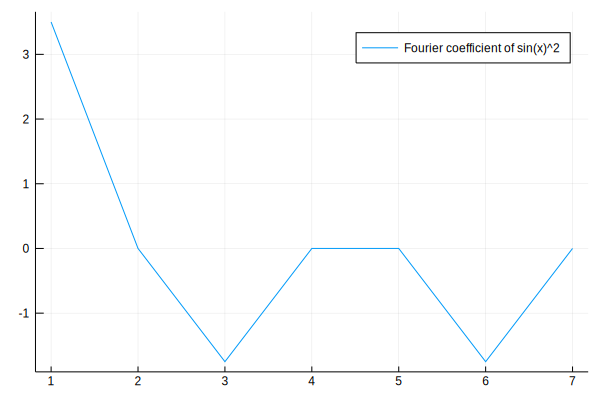

In [56]:
fc = ifft(g_hat);
y = fc.^2;
y_hat=fft(y);
yc = ifft(y_hat);
#print(y_hat)
plot(real(y_hat),label="Fourier coefficient of sin(x)^2")

### Extension from example 1 ---- Wrong steps
In the following, we want to find Fourier coefficients of $sin^3(x)$.
* First, we do truncating, to remove the wrong frequency. (Same with the above example)
* Second, we do ifft to g_hat.
* Third, we put fc. cubic, and do ifft.
* Fourth, we plot the ploral part of y_hat.

In [38]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
g = sin.(x);
g_hat=fft(g)

for i = 1:4;
    if i >= 1+2/3*length(g_hat[2:4]);
        g_hat[i]=0;
    end
end
for i = 5:N;
    if i <= length(g_hat[1:4])+2/3*length(g_hat[5:N]);
        g_hat[i]=0;
    end
end
print(g_hat)

Complex{Float64}[1.1102230246251565e-16 + 0.0im, -2.6927654968739966e-16 - 3.5000000000000004im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -2.6927654968739966e-16 + 3.5000000000000004im]

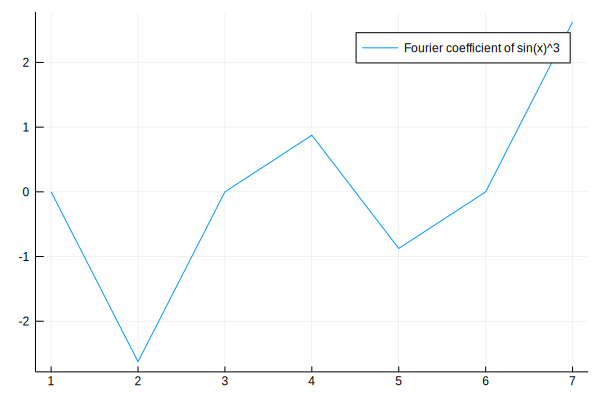

In [44]:
fc = ifft(g_hat);
u = fc.^3;
u_hat=fft(u);
#print(y_hat)
plot(imag(u_hat),label="Fourier coefficient of sin(x)^3")

### Extension from example 1 ---- Correct steps

In the following, we want to find Fourier coefficients of $sin^3(x)$.
* First, from above example we obtain Fourier coefficients of $sin(x)$, and because we will get $\hat{g}_{1}$、$\hat{g}_{-1}$, so N=7 is sufficient, so we don't need to do truncating.
* Second, from above example we obtain correct Fourier coefficients of $sin^2(x)$ by doing truncating.
* Third, we multiply fc and yc, and do fft.
* Fourth, we plot the plural part of h_hat. 

# The following example has some problem!

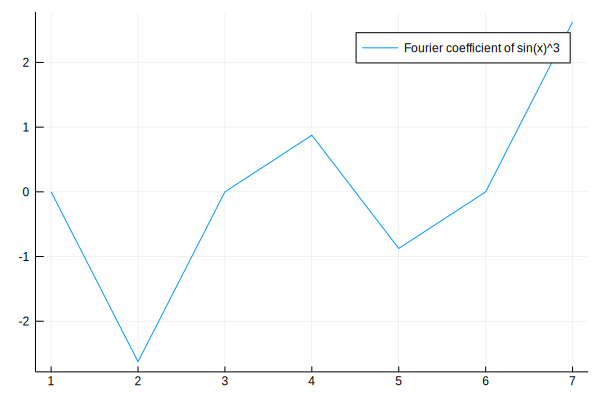

In [49]:
h = fc.*yc;
h_hat=fft(h);
plot(imag(h_hat),label="Fourier coefficient of sin(x)^3")

### Example 2
Let g(x)=sin(3x), $f(x)=g^2(x)=sin^2(3x)=1-cos(6x)/2$, so there will exists $\hat{f}_{0}$、$\hat{f}_{6}$、$\hat{f}_{-6}$, so if we wet N=7, it will contain $\hat{f}_{-3}, \hat{f}_{-2}, \hat{f}_{-1}, \hat{f}_{0}, \hat{f}_{1}, \hat{f}_{2}, \hat{f}_{3}$, so it's not enough.

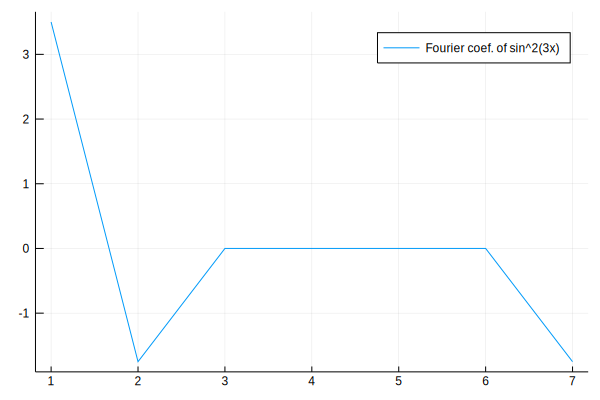

In [65]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
g = sin.(3x);
f= g.^2;
f_hat = fft(f);
plot(real(f_hat),label="Fourier coef. of sin^2(3x)")

#c=length(f_hat[1:4])

In the following, we do truncating, to remove high frequency.

Here we set N=7, so K < (2/3)(N/2)=2

 $-3\quad-2\quad-1\qquad0\qquad1\quad\qquad2\qquad\quad3\implies\hat{g}_{i}$

$|---|---|---|---|---|---| $

$5\qquad6\qquad7\qquad\quad1\qquad2\qquad\quad3\qquad\quad4\implies{g}_{hat}$

so we let $\hat{g}_{2}$、$\hat{g}_{3}$、$\hat{g}_{-3}$ 、$\hat{g}_{-2}$to be zero.


In [60]:
N=7;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
g = sin.(3x);
g_hat=fft(g)

for i = 1:4;
    if i >= 1+2/3*length(g_hat[2:4]);
        g_hat[i]=0;
    end
end
for i = 5:N;
    if i <= length(g_hat[1:4])+2/3*length(g_hat[5:N]);
        g_hat[i]=0;
    end
end
print(g_hat)

Complex{Float64}[4.440892098500626e-16 + 0.0im, 3.1409150959813785e-16 + 1.0534146446629733e-16im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 3.1409150959813785e-16 - 1.0534146446629733e-16im]

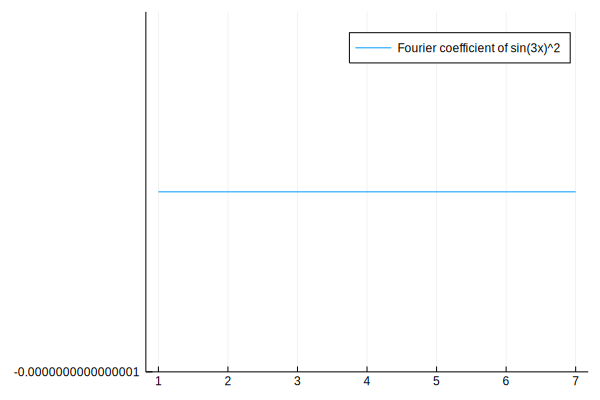

In [61]:
fc = ifft(g_hat);
y = fc.^2;
y_hat=fft(y);
yc = ifft(y_hat);
#print(y_hat)
plot(real(y_hat),label="Fourier coefficient of sin(3x)^2")

# N is even

### Example 1
Let g(x)=sin(x), $f(x)=g^2(x)=sin^2(x)=1-cos(2x)/2$, so there will exists $\hat{f}_{0}$、$\hat{f}_{2}$、$\hat{f}_{-2}$, so if we wet N=8, it will contain $\hat{f}_{-3}, \hat{f}_{-2}, \hat{f}_{-1}, \hat{f}_{0}, \hat{f}_{1}, \hat{f}_{2}, \hat{f}_{3}, \hat{f}_{4}$, so it's enough, that is whether we do truncation or not isn't important.

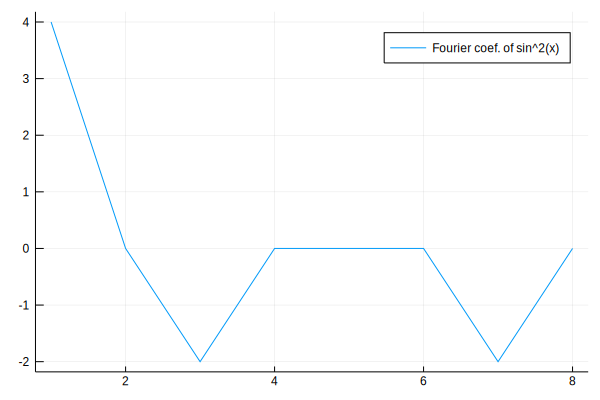

In [71]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
g = sin.(x);
f= g.^2;
f_hat = fft(f);
plot(real(f_hat),label="Fourier coef. of sin^2(x)")

#c=length(f_hat[1:4])

In the following, we do truncating, to remove high frequency.

Here we set N=8

 $-3\quad-2\quad-1\qquad0\qquad1\quad\qquad2\qquad\quad3\qquad\quad4\implies\hat{g}_{i}$

$|---|---|---|---|---|---|---| $

$6\qquad7\qquad8\qquad\quad1\qquad2\qquad\quad3\qquad\quad4\qquad\quad5\implies{g}_{hat}$

so K<(2/3)(N/2)=2 $\qquad\qquad\qquad\qquad$ K<(2/3)(N/2)=8/3

so we let $\hat{g}_{3}$、$\hat{g}_{4}$、$\hat{g}_{-2}$ 、$\hat{g}_{-3}$to be zero.


In [70]:
N=8;
x = range(0,stop=2*pi,length=N+1);
x = x[1:N];
g = sin.(x);
g_hat=fft(g)

for i = 1:5;
    if i >= 1+2/3*length(g_hat[2:5]);
        g_hat[i]=0;
    end
end
for i = 6:N;
    if i <= length(g_hat[1:5])+2/3*length(g_hat[6:N]);
        g_hat[i]=0;
    end
end
print(g_hat)

Complex{Float64}[1.1442377452219667e-17 + 0.0im, -4.3648317165149033e-16 - 4.0im, 1.2246467991473532e-16 - 1.1102230246251565e-16im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, -4.3648317165149033e-16 + 4.0im]

#### $\therefore$ we can observe that the results is same.

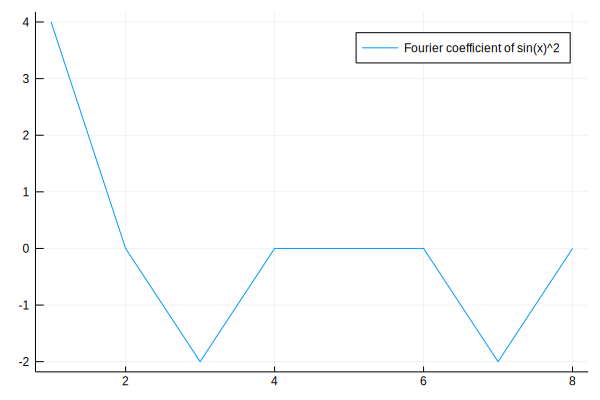

In [72]:
fc = ifft(g_hat);
y = fc.^2;
y_hat=fft(y);
yc = ifft(y_hat);
#print(y_hat)
plot(real(y_hat),label="Fourier coefficient of sin(x)^2")

## Conclusion

### * $ When\space N\space is\space odd\implies using\space truncating$
### * $ When\space N\space is\space even\implies using\space zero-padding$

### Will not have a lot of problems!